In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import numpy as np
import os
from  tensorflow.keras.preprocessing import image
from  tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd 
from tensorflow.keras import regularizers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
file1 = open('/content/drive/MyDrive/projet/d.csv', 'r')
data = np.loadtxt(file1,delimiter = ",")

In [3]:
len(data)

64104192

In [4]:
df = pd.read_csv('/content/drive/MyDrive/projet/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
labels = {0 : "Neutral",1 : "Happy",2 : "Sad",3 : "Surprise",4 : "anger",5 : "fear",6 : "disgust"}
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [6]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [7]:
img_array.shape

(35887, 48, 48, 1)

In [8]:
dct = {0 : 4,1 : 6 , 2 : 5 , 3 : 1 , 4 : 2 , 5 : 3 ,6:0}

In [9]:
df['emotion'] = df['emotion'].apply(lambda x : dct[x])

In [11]:
img_labels=df.emotion

In [12]:
img_labels= np.array(img_labels)

In [13]:
img_labels.shape

(35887,)

In [14]:
file2 = open('/content/drive/MyDrive/projet/y.csv', 'rb')
label = np.loadtxt(file2,delimiter = ",")

In [15]:
X=[]
for i in range(27823):
    X.append(np.reshape(data[i*2304:2304+i*2304],(48,48,1)))

In [16]:
X = np.array(X)

In [17]:
labels = {0 : "Neutral",1 : "Happy",2 : "Sad",3 : "Surprise",4 : "anger",5 : "fear",6 : "disgust"}

In [18]:
X.shape

(27823, 48, 48, 1)

In [19]:
label = label.astype(int)    

In [20]:
label

array([0, 0, 0, ..., 6, 6, 6])

In [21]:
img_labels

array([4, 4, 5, ..., 4, 1, 5])

In [22]:
img_array.shape

(35887, 48, 48, 1)

In [23]:

X=X.reshape(-1,48,48,1)

In [24]:
X=np.concatenate((X,img_array), axis=0)

In [25]:
label=np.concatenate((label,img_labels), axis=None)

In [26]:
len(X)

63710

In [28]:
len(label)

63710

In [29]:
x_data, x_test, y_data, y_test = train_test_split(X, label, test_size=0.1, shuffle= True)

In [30]:
x_train,x_val,y_train,y_val = train_test_split(x_data, y_data, test_size=0.2, shuffle= True)

Vizualization

In [31]:
# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [32]:
x_train.shape

(45871, 48, 48, 1)

In [33]:
num_train = 45871
num_val = 11468
batch_size = 64
num_epoch = 100

In [34]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(48, 
                                                              48,
                                                             1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [35]:
# Create the model
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(64, (3, 3), input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(32,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(7))
model.add(Activation('softmax'))

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import Callback, EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)
callbacks = [
    early_stopping
]

In [38]:
model_info = model.fit(
        x_train,
        y_train,
        epochs=num_epoch,
        validation_data=(x_val,y_val),
        callbacks=callbacks
        )
        #validation_steps = num_val // batch_size)


Epoch 1/100
1434/1434 [==============================] - 34s 13ms/step - loss: 1.9394 - accuracy: 0.2260 - val_loss: 1.9221 - val_accuracy: 0.2344
Epoch 2/100
1434/1434 [==============================] - 18s 13ms/step - loss: 1.8275 - accuracy: 0.2826 - val_loss: 1.7685 - val_accuracy: 0.2931
Epoch 3/100
1434/1434 [==============================] - 18s 13ms/step - loss: 1.6450 - accuracy: 0.3576 - val_loss: 1.6067 - val_accuracy: 0.3727
Epoch 4/100
1434/1434 [==============================] - 19s 13ms/step - loss: 1.4996 - accuracy: 0.4101 - val_loss: 2.9995 - val_accuracy: 0.3283
Epoch 5/100
1434/1434 [==============================] - 18s 13ms/step - loss: 1.4274 - accuracy: 0.4513 - val_loss: 1.5008 - val_accuracy: 0.4080
Epoch 6/100
1434/1434 [==============================] - 19s 13ms/step - loss: 1.3741 - accuracy: 0.4765 - val_loss: 1.3095 - val_accuracy: 0.5026
Epoch 7/100
1434/1434 [==============================] - 18s 13ms/step - loss: 1.3359 - accuracy: 0.4911 - val_loss: 1

In [39]:
who

Activation	 BatchNormalization	 Callback	 Conv2D	 Dense	 Dropout	 EarlyStopping	 Flatten	 LabelEncoder	 
MaxPooling2D	 Sequential	 X	 batch_size	 callbacks	 classification_report	 data	 data_augmentation	 dct	 
df	 early_stopping	 el	 emotion_label_to_text	 f	 file1	 file2	 i	 image	 
img_array	 img_labels	 label	 labels	 layers	 model	 model_info	 np	 num_epoch	 
num_train	 num_val	 os	 pd	 plot_model_history	 regularizers	 temp	 tf	 to_categorical	 
train_test_split	 x_data	 x_test	 x_train	 x_val	 y_data	 y_test	 y_train	 y_val	 



In [40]:
del data,X,x_data,img_array,df

In [41]:
import gc

In [42]:
gc.collect()

2976

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


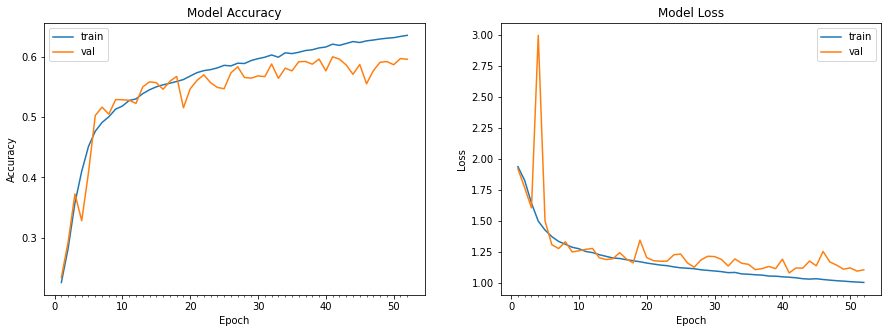

200/200 [==============================] - 1s 5ms/step - loss: 1.0645 - accuracy: 0.6112
accuracy: 61.12%


In [43]:
from matplotlib import pyplot as plt
plot_model_history(model_info)
#model.save_weights('model.h5')
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [44]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
x_test[0].reshape((-1,48,48,1))

array([[[[0.08627451],
         [0.08627451],
         [0.08627451],
         ...,
         [0.03529412],
         [0.01568628],
         [0.12941177]],

        [[0.08627451],
         [0.08627451],
         [0.08235294],
         ...,
         [0.06666667],
         [0.05490196],
         [0.03137255]],

        [[0.08235294],
         [0.08627451],
         [0.08627451],
         ...,
         [0.04313726],
         [0.05098039],
         [0.05882353]],

        ...,

        [[0.07058824],
         [0.07450981],
         [0.08235294],
         ...,
         [0.72156864],
         [0.72941178],
         [0.72549021]],

        [[0.06666667],
         [0.07450981],
         [0.07843138],
         ...,
         [0.73333335],
         [0.72549021],
         [0.74509805]],

        [[0.0627451 ],
         [0.07058824],
         [0.07843138],
         ...,
         [0.71372551],
         [0.72941178],
         [0.74509805]]]])

In [46]:
predict_x = model.predict(x_test) 
yhat_valid = np.argmax(predict_x,axis=1)

In [47]:
yhat_valid

array([3, 2, 1, ..., 5, 5, 3])

In [48]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


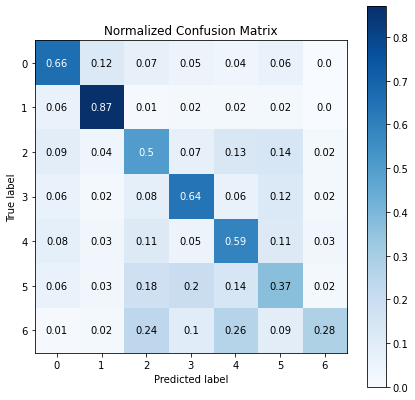

In [49]:
import scikitplot
predict_x = model.predict(x_test) 
yhat_valid = np.argmax(predict_x,axis=1)
scikitplot.metrics.plot_confusion_matrix(y_test, yhat_valid, figsize=(7,7), normalize=True)
plt.savefig("confusion_matrix_dcnn.png")


In [50]:
labels

{0: 'Neutral',
 1: 'Happy',
 2: 'Sad',
 3: 'Surprise',
 4: 'anger',
 5: 'fear',
 6: 'disgust'}

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_valid))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1160
           1       0.82      0.87      0.85      1416
           2       0.49      0.50      0.49       942
           3       0.57      0.64      0.60       841
           4       0.52      0.59      0.55       841
           5       0.41      0.37      0.39       856
           6       0.52      0.28      0.36       315

    accuracy                           0.61      6371
   macro avg       0.58      0.56      0.56      6371
weighted avg       0.61      0.61      0.61      6371



In [52]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.0 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=29b7fe120209a91e5310869ae5d2c2e202263481ed676d3f6c6a94976325ab12
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=3a857f284d29f7f7cd19d86479daddd03934f2a375c3f7457f56016b77e1136a
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#model = tf.keras.models.load_model('model.h5')

In [ ]:
#model = model.load_weights('modelEM.h5')

In [53]:
from matplotlib import pyplot as plt

In [54]:
import cv2
import cvlib as cv

In [55]:
img = cv2.imread('gd.jpg')

In [56]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [57]:
labels = {0 : "Neutral",1 : "Happy",2 : "Sad",3 : "Surprise",4 : "anger",5 : "fear",6 : "disgust"}

In [58]:
img = cv2.resize(img, (512, 512))
#img = np.stack(img, axis=0)
img = np.repeat(img[..., np.newaxis], 3, -1)
img = img.reshape((512,512,3))

:

In [59]:
img.shape

(512, 512, 3)

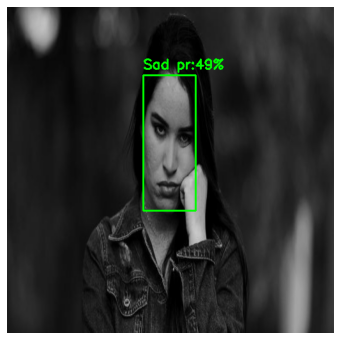

In [60]:
#img = cv2.imread(image_path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face, confidence = cv.detect_face(img)
for  f in face :
    (startX, startY)=f[0], f[1]
    (endX, endY)= f[2], f[3]
    if (f[2] > 512 or f[3] > 512):
        break
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)
    
    face_crop = np.copy(img[startY:endY,startX:endX])
    
    face_crop = cv2.resize(face_crop, (48,48))
    face_crop = np.array(face_crop)
    face_crop = face_crop[0:48,0:48,2:]
    face_crop = np.expand_dims(face_crop, 0)
    
    cf = model.predict(face_crop)
    
    score = np.argmax(cf)
    label = labels[score]
    idx = 100 * np.max(cf)
    label = label +" pr:"+ str(int(idx))+"%"
    Y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [61]:
model.save('modelfin.h5')